In [1]:
import time 
start_time = time.time() # Allows the program's runtime to be measured

import os
import pandas as pd
import time
import json
import numpy as np
import matplotlib.pyplot as plt



In [2]:
folder_with_step_files = r'C:\Users\kburc\D1V1\Documents\!Dell64docs\!Organization\fitbit_logs\MyFitbitData\KennethBurchfiel\Physical Activity'

os.chdir(folder_with_step_files)

with open('combined_steps_file.json', "w") as destination_file: # Overwrites what had been in the file 
    # previously
    destination_file.write('[')

combined_steps_list = []

path_list = []
for dirpath, dirnames, filenames in os.walk(top=folder_with_step_files):
    for name in filenames:
        if ("steps" in name) and ("combined" not in name) and ("daily" not in name) and (".png" not in name): 
            # Thees statements exclude non-json files from being added to the document
            print("Now adding steps for",name)
            with open(name) as source_file:
                for line in source_file:
                    combined_steps_list.append(line)

Now adding steps for steps-2020-01-19.json
Now adding steps for steps-2020-02-18.json
Now adding steps for steps-2020-03-19.json
Now adding steps for steps-2020-04-18.json
Now adding steps for steps-2020-05-18.json
Now adding steps for steps-2020-06-17.json
Now adding steps for steps-2020-07-17.json
Now adding steps for steps-2020-08-16.json
Now adding steps for steps-2020-09-15.json
Now adding steps for steps-2020-10-15.json
Now adding steps for steps-2020-11-14.json
Now adding steps for steps-2020-12-14.json
Now adding steps for steps-2021-01-13.json
Now adding steps for steps-2021-02-12.json
Now adding steps for steps-2021-03-14.json
Now adding steps for steps-2021-04-13.json
Now adding steps for steps-2021-05-13.json
Now adding steps for steps-2021-06-12.json
Now adding steps for steps-2021-07-12.json
Now adding steps for steps-2021-08-11.json
Now adding steps for steps-2021-09-10.json


In [3]:
len(combined_steps_list)
print(combined_steps_list[2])

# The following code looks for cases where one of the original .json files
# ended and the other began. It then replaces the final line of the first 
# file ('}]') and the first line of the new file ('[{') with characters that
# match the regular separation between entries (},{). In doing so, the 
# resulting file (combined_steps_list) will be seen as one large .json file
# rather than a series of individual files. 

os.chdir(folder_with_step_files)

with open('combined_steps_file.json', 'w') as file:
    for i in range(len(combined_steps_list)):
        if i != (len(combined_steps_list) -1):
            if ((combined_steps_list[i] == '}]') and
            (combined_steps_list[i+1].strip() == '[{')):
                # There was a 3rd character, probably a space, in these lines, hence the use of the strip() function.
                print('Condition met')
                combined_steps_list[i] = '},'
                combined_steps_list[i+1] = '{'

        file.write(combined_steps_list[i])

  "value" : "0"

Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met
Condition met


In [5]:
print(os.getcwd())
path = 'combined_steps_file.json'
df_steps = pd.io.json.read_json(path) 
# https://pandas.pydata.org/docs/reference/api/pandas.io.json.read_json.html
df_steps
    

C:\Users\kburc\D1V1\Documents\!Dell64docs\!Organization\fitbit_logs\MyFitbitData\KennethBurchfiel\Physical Activity


,dateTime,value
0,2020-01-20 19:05:00,0
1,2020-01-20 19:38:00,0
2,2020-01-20 19:39:00,0
3,2020-01-20 19:40:00,0
4,2020-01-20 19:41:00,61
...,...,...
529251,2021-09-16 18:26:00,0
529252,2021-09-16 18:27:00,0
529253,2021-09-16 18:28:00,0
529254,2021-09-16 18:29:00,0


In [6]:
df_daily_steps = df_steps.resample('D',on='dateTime').sum()
df_daily_steps

,value
dateTime,
2020-01-20,166
2020-01-21,4324
2020-01-22,7259
2020-01-23,8154
2020-01-24,15363
...,...
2021-09-12,12818
2021-09-13,14098
2021-09-14,15125


In [19]:
df_daily_steps.sort_values('steps')

,steps,7_day_avg
Date,,
2020-04-19,0,3397.000000
2020-04-20,0,2198.142857
2020-04-21,0,1367.857143
2020-01-20,166,NaN
2020-04-17,476,5647.142857
...,...,...
2021-06-06,21352,11141.428571
2021-05-01,21591,15279.000000
2021-06-27,22691,9155.285714


In [7]:
df_daily_steps['7_day_avg'] = df_daily_steps.rolling(7).mean()
df_daily_steps.rename(columns={'value':'steps'},inplace=True)
df_daily_steps.index.rename('Date',inplace=True)
df_daily_steps.to_csv('daily_steps.csv')
df_daily_steps

,steps,7_day_avg
Date,,
2020-01-20,166,NaN
2020-01-21,4324,NaN
2020-01-22,7259,NaN
2020-01-23,8154,NaN
2020-01-24,15363,NaN
...,...,...
2021-09-12,12818,11290.857143
2021-09-13,14098,11986.714286
2021-09-14,15125,11664.428571


In [8]:
df_weekly_steps = df_steps.resample('W',on='dateTime').sum()
# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas.Series.resample

In [9]:
df_weekly_steps

,value
dateTime,
2020-01-26,57359
2020-02-02,77256
2020-02-09,48192
2020-02-16,34599
2020-02-23,53174
...,...
2021-08-22,64729
2021-08-29,66970
2021-09-05,74726


In [10]:
len(df_weekly_steps)

87

In [11]:
formatted_dates = []
for i in range(len(df_weekly_steps)):
    formatted_dates.append(df_weekly_steps.index[i].strftime("%Y-%m-%d"))
# formatted_dates

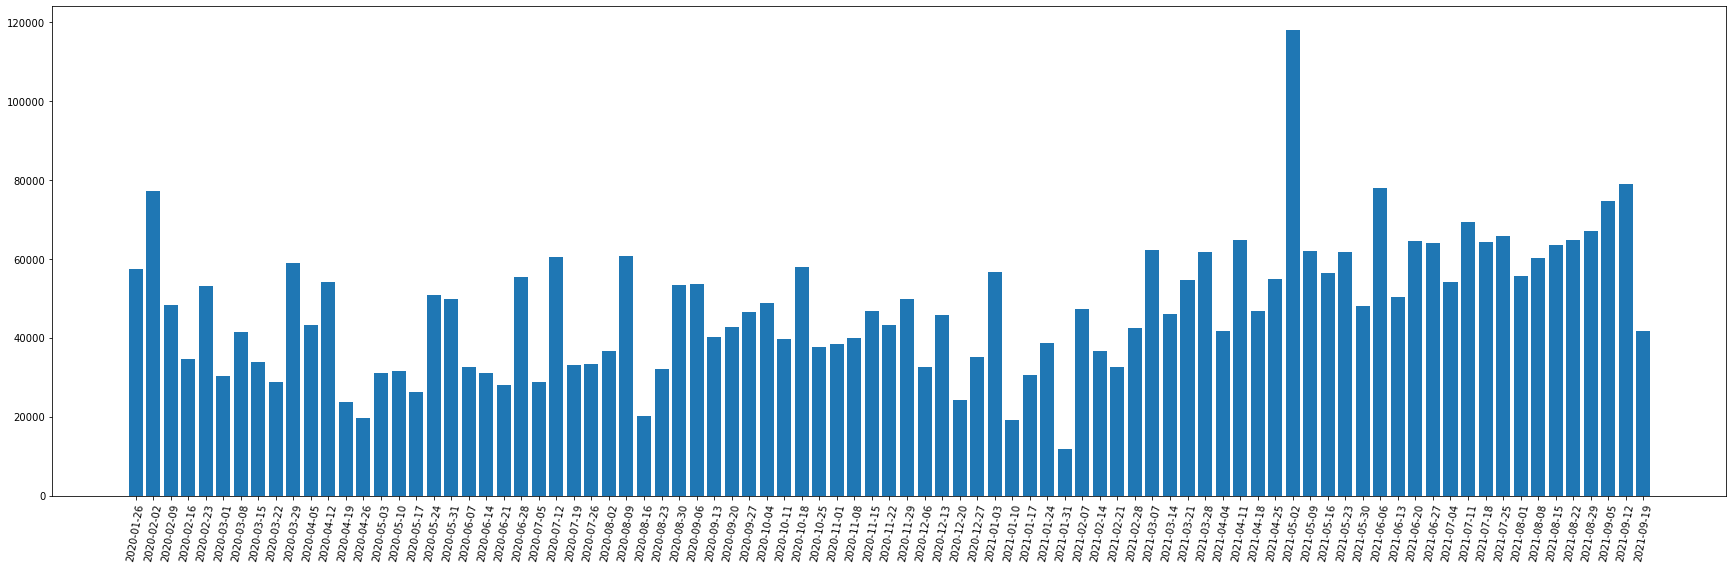

In [12]:
fig, ax = plt.subplots(figsize=[30,9])
fig.set_facecolor('white')
xrange = np.arange(len(df_weekly_steps))
weekly_step_graph = plt.bar(x = xrange, height=df_weekly_steps['value']) # df_weekly_steps.index can also be used in place of x, but this messes with the chart's appearance
plt.xticks(np.arange(len(df_weekly_steps)), formatted_dates, rotation=80) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

plt.savefig('weekly_steps.png',dpi=400)

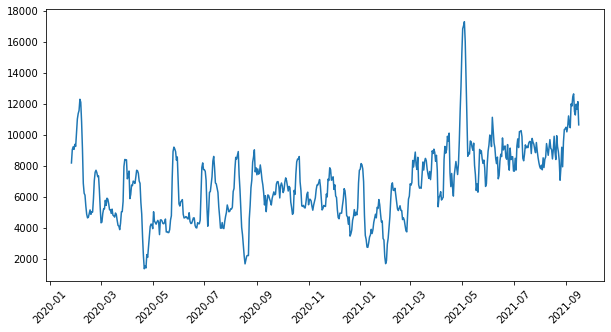

In [13]:
fig, ax = plt.subplots(figsize=[10,5])
weekly_step_graph = plt.plot(df_daily_steps['7_day_avg']) # df_weekly_steps.index can also be used in place of x, but this messes with the chart's appearance
fig.set_facecolor('white')
plt.xticks(rotation=45)
plt.savefig('7_day_rolling_step_average.png',dpi=400)

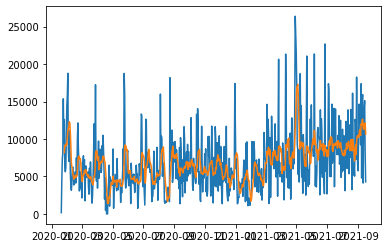

In [14]:
plt.plot(df_daily_steps)

In [15]:
print(sum(df_steps['value']))

4133525


In [16]:
end_time = time.time()
run_time = end_time - start_time
run_minutes = run_time // 60
run_seconds = run_time % 60
print("Completed run at",time.ctime(end_time),"(local time)")
print("Total run time:",'{:.2f}'.format(run_time),"second(s) ("+str(run_minutes),"minute(s) and",'{:.2f}'.format(run_seconds),"second(s))") # Only meaningful when the program is run nonstop from start to finish

Completed run at Wed Oct 13 18:27:41 2021 (local time)
Total run time: 56.80 second(s) (0.0 minute(s) and 56.80 second(s))
